In [3]:
# Aoife Kennedy 20267746
# Gerard O Connell 19192118

In [4]:
# Code compiles and executes

In [28]:
#modified and refined version using pytorch to work in jupyter notebook original working take from https://github.com/Ger-oc/LunarLanderDRLV2
# https://www.freecodecamp.org/news/learn-pytorch-for-deep-learning-in-day
#/https://github.com/mrdbourke


In [6]:
!apt-get update > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install -y swig build-essential python-dev python3-dev > /dev/null 2>&1
!apt-get install x11-utils > /dev/null 2>&1
!apt-get install xvfb > /dev/null 2>&1

In [7]:
!pip install gym==0.25.2
!pip install rarfile --quiet
!pip install stable-baselines3[extra] --quiet
!pip install ale-py --quiet
!pip install gym[box2d] --quiet
!pip install pyvirtualdisplay --quiet
!pip install pyglet --quiet
!pip install pygame --quiet
!pip install minigrid --quiet
!pip install -q swig --quiet
!pip install -q gymnasium[box2d] --quiet
!pip install 'minigrid<=2.1.1' --quiet
!pip3 install box2d-py --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 11.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 97.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed build

In [8]:
import random
import sys
from time import time
from collections import deque, defaultdict, namedtuple
import numpy as np
import pandas as pd
import gym
from gym.wrappers.monitoring.video_recorder import VideoRecorder
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

<ipython-input-8-e8c810993f1c>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Gym Environment


In [9]:
env = gym.make('LunarLander-v2')
env.seed(0)

# inspect action space and state space
print(env.action_space)
print(env.observation_space.shape[0])
print("******")
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)
print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Discrete(4)
8
******
State shape:  (8,)
Number of actions:  4




/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [10]:
print(env.observation_space, env.action_space)

print(env.observation_space.sample())

Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32) Discrete(4)
[ 0.80298537  1.201632   -4.7791867  -0.317678    0.10824766 -3.4223442
  0.9337027   0.29177192]


In [11]:
# agent that takes random actions
max_episodes = 100
scores = []
actions = range(env.action_space.n)
for i in range(1, max_episodes+1):
    state = env.reset()
    score = 0
    while True:
        action = np.random.choice(actions)
        state, reward, done, info = env.step(action)
        score += reward
        if done:
            if i % 20 == 0:
                print('Episode {},  score: {}'.format(i, score))
            break

    scores.append(score)

Episode 20,  score: -362.3470531408585
Episode 40,  score: -85.21419049523631
Episode 60,  score: -280.8231719551604
Episode 80,  score: -292.3169961476244
Episode 100,  score: -160.92069684032842


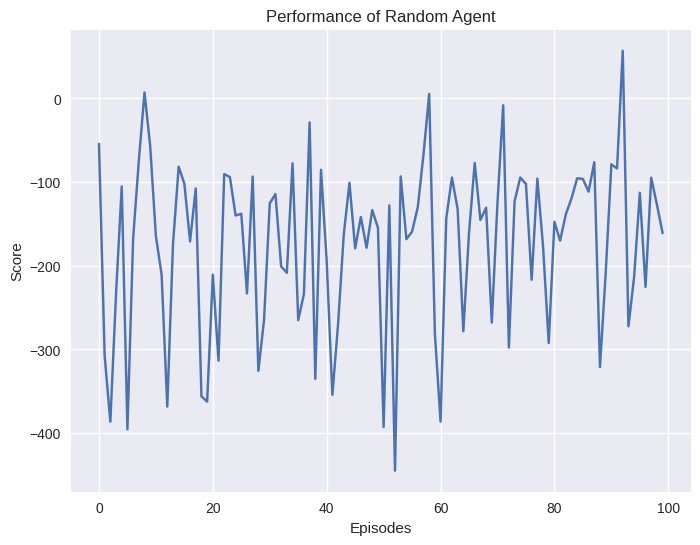

In [12]:
# show random agent's performance
plt.figure(figsize=(8,6))
plt.plot(range(max_episodes), scores)
plt.title('Performance of Random Agent')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()

In [13]:
# average score
print('Average score of random agent over {} episodes: {:.2f}'.format(max_episodes, np.mean(scores)))

Average score of random agent over 100 episodes: -173.18


In [14]:
# use cuda if available else use cpu
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Q Network


In [15]:
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, seed):

        super(QNetwork, self).__init__()
        # Set the seed for reproducibility
        self.seed = torch.manual_seed(seed)
        # Define the fully connected layers
        self.fc1 = nn.Linear(state_size, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, x):
        # Define the forward pass of the network

        # Apply the first fully connected layer with ReLU activation
        x = F.relu(self.fc1(x))
        # Apply the second fully connected layer with ReLU activation
        x = F.relu(self.fc2(x))
        # Apply the third fully connected layer (output layer)
        x = self.fc3(x)

        return x

### Replay Memory

In [16]:
class ReplayMemory:
    def __init__(self, buffer_size, batch_size, seed):


        self.batch_size = batch_size
        self.seed = random.seed(seed)
        self.memory = deque(maxlen=buffer_size)
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

    def add(self, state, action, reward, next_state, done):

        experience = self.experience(state, action, reward, next_state, done)
        self.memory.append(experience)

    def sample(self):

        experiences = random.sample(self.memory, k=self.batch_size)

        # convert to torch tensors
        states = torch.from_numpy(np.vstack([experience.state for experience in experiences if experience is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([experience.action for experience in experiences if experience is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([experience.reward for experience in experiences if experience is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([experience.next_state for experience in experiences if experience is not None])).float().to(device)
        # convert done from boolean to int
        dones = torch.from_numpy(np.vstack([experience.done for experience in experiences if experience is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        return len(self.memory)

### Agent

In [17]:
BUFFER_SIZE = int(1e5) # replay memory size
BATCH_SIZE = 64         # number of experiences to sample from memory
GAMMA = 0.99            # discount factor
TAU = 1e-3              # soft update parameter for updating target q network
LR = 1e-4               # Q Network learning rate
UPDATE_EVERY = 4        # how often to update Q network

In [18]:
class DQNAgent:
    def __init__(self, state_size, action_size, seed):

        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        # initialize Q and Target Q networks
        self.q_network = QNetwork(state_size, action_size, seed).to(device)
        self.target_network = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.q_network.parameters())
        # initiliase memory
        self.memory = ReplayMemory(BUFFER_SIZE, BATCH_SIZE, seed)
        self.timestep = 0

#Update Agent's knowledge
    def step(self, state, action, reward, next_state, done):

        self.memory.add(state, action, reward, next_state, done)
        self.timestep += 1
        if self.timestep % UPDATE_EVERY == 0:
            if len(self.memory) > BATCH_SIZE:
                sampled_experiences = self.memory.sample()
                self.learn(sampled_experiences)
#Learn from experience by training the q_network
    def learn(self, experiences):

        states, actions, rewards, next_states, dones = experiences
        # get the action with max Q value
        action_values = self.target_network(next_states).detach()

        # tensor.max(1)[0] returns the values, tensor.max(1)[1] will return indices
        # make it from torch.Size([64]) -> torch.Size([64, 1])
        max_action_values = action_values.max(1)[0].unsqueeze(1)

        # if done just use reward, else update Q_target with discounted action values
        Q_target = rewards + (GAMMA * max_action_values * (1 - dones))
        Q_expected = self.q_network(states).gather(1, actions)

        # calculate loss
        loss = F.mse_loss(Q_expected, Q_target)
        self.optimizer.zero_grad()
        # backward pass
        loss.backward()
        # update weights
        self.optimizer.step()

        # update target weights
        self.update_target_network(self.q_network, self.target_network)

    def update_target_network(self, q_network, target_network):

        for source_parameters, target_parameters in zip(q_network.parameters(), target_network.parameters()):
            target_parameters.data.copy_(TAU * source_parameters.data + (1.0 - TAU) * target_parameters.data)


    def act(self, state, eps=0.0):

        rnd = random.random()
        if rnd < eps:
            return np.random.randint(self.action_size)
        else:
            state = torch.from_numpy(state).float().unsqueeze(0).to(device)
            # set the network into evaluation mode
            self.q_network.eval()
            with torch.no_grad():
                action_values = self.q_network(state)
            # back to training mode
            self.q_network.train()
            action = np.argmax(action_values.cpu().data.numpy())
            return action

    def checkpoint(self, filename):
        torch.save(self.q_network.state_dict(), filename)

### Training


In [29]:
MAX_EPISODES = 10000  # max number of episodes to play
MAX_STEPS = 1000     # max steps allowed in a single episode/play
ENV_SOLVED = 200     # max score at which we consider environment to be solved
PRINT_EVERY = 100    # how often to print the progress

# epsilon schedule
EPS_START = 1.0      # starting value of eps
EPS_DECAY = 0.999    # epsilon decay rate changed from .995
EPS_MIN = 0.01       # min epsilon

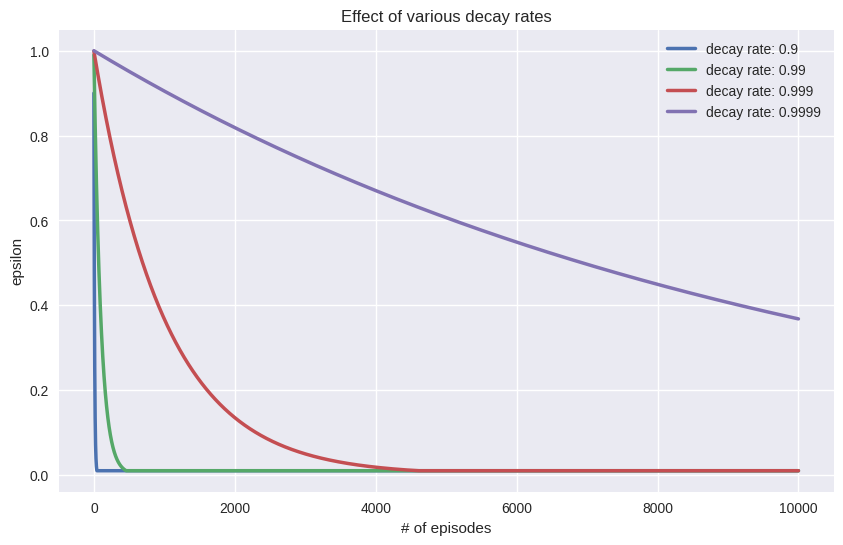

In [30]:
EPS_DECAY_RATES = [0.9, 0.99, 0.999, 0.9999]
plt.figure(figsize=(10,6))

for decay_rate in EPS_DECAY_RATES:
    test_eps = EPS_START
    eps_list = []
    for _ in range(MAX_EPISODES):
        test_eps = max(test_eps * decay_rate, EPS_MIN)
        eps_list.append(test_eps)

    plt.plot(eps_list, label='decay rate: {}'.format(decay_rate), linewidth=2.5)

plt.title('Effect of various decay rates')
plt.legend(loc='best')
plt.xlabel('# of episodes')
plt.ylabel('epsilon')
plt.show()

In [31]:
# check state and action sizes
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

print('State size: {}, Action size: {}'.format(state_size, action_size))

State size: 8, Action size: 4


In [32]:
dqn_agent = DQNAgent(state_size, action_size, seed=0)
start = time()
scores = []
# make a list of last 100 scores
scores_window = deque(maxlen=100)
eps = EPS_START
for episode in range(1, MAX_EPISODES + 1):
    state = env.reset()
    score = 0
    for t in range(MAX_STEPS):
        action = dqn_agent.act(state, eps)
        next_state, reward, done, info = env.step(action)
        dqn_agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break

        eps = max(eps * EPS_DECAY, EPS_MIN)
        if episode % PRINT_EVERY == 0:
            mean_score = np.mean(scores_window)
            print('\rProgress {}/{}, average score:{:.2f}'.format(episode, MAX_EPISODES, mean_score), end="")
        if score >= ENV_SOLVED:
            mean_score = np.mean(scores_window)
            print('\rEnvironment solved in {} episodes, average score: {:.2f}'.format(episode, mean_score), end="")
            sys.stdout.flush()
            dqn_agent.checkpoint('checkpoint.pth')
            break

    scores_window.append(score)
    scores.append(score)

end = time()
print('Took {} seconds'.format(end - start))

Environment solved in 10000 episodes, average score: 258.66Took 4428.282357215881 seconds


In [33]:
dqn_agent.checkpoint('checkpoint.pth')

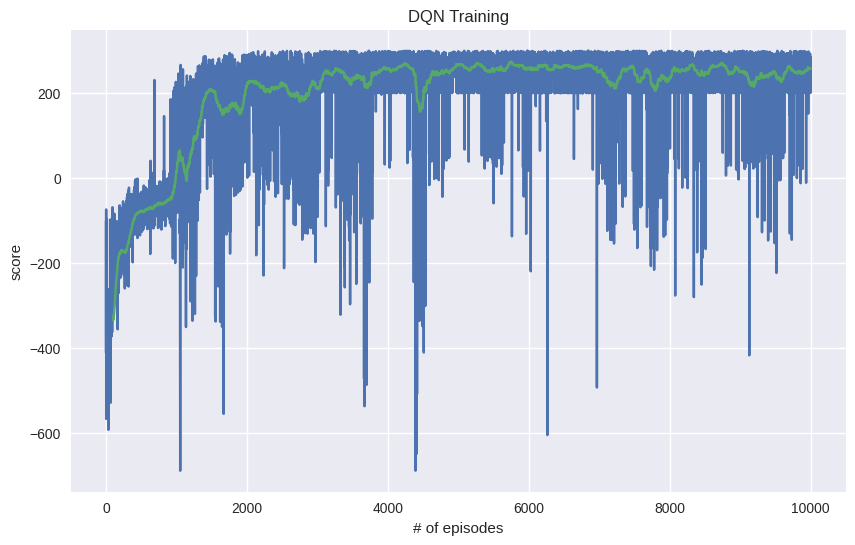

In [34]:
plt.figure(figsize=(10,6))
plt.plot(scores)
plt.plot(pd.Series(scores).rolling(100).mean())
plt.title('DQN Training')
plt.xlabel('# of episodes')
plt.ylabel('score')
plt.show()

In [35]:
dqn_agent.q_network.load_state_dict(torch.load('checkpoint.pth'))

<All keys matched successfully>

In [36]:
import os
import gym
from gym.wrappers.monitoring.video_recorder import VideoRecorder

env = gym.make('LunarLander-v2')
env.seed(0)

# directory for video recording
video_dir = '/content/lunar-lander-videos/'  # Change the path to your desired directory

# create the directory if it doesn't exist
os.makedirs(video_dir, exist_ok=True)

for i in range(5):
    score = 0
    state = env.reset()

    # create a VideoRecorder for each episode
    video_path = os.path.join(video_dir, f'episode_{i}.mp4')
    video_recorder = VideoRecorder(env, video_path)

    while True:
        action = dqn_agent.act(state)
        next_state, reward, done, info = env.step(action)
        state = next_state
        score += reward

        # capture frames for the video
        video_recorder.capture_frame()

        if done:
            video_recorder.close()  # save the recorded video for this episode
            break

    print(f'Episode {i}: Scored {score}')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized

Episode 0: Scored 290.02486510602284


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 1: Scored 244.8779700090014


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 2: Scored 276.9981372774414


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 3: Scored 288.5662794717762


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 4: Scored 131.7804483312091


In [27]:
env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
